K Means Clustering Algorithms Implementation

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline


In [3]:
x,y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)

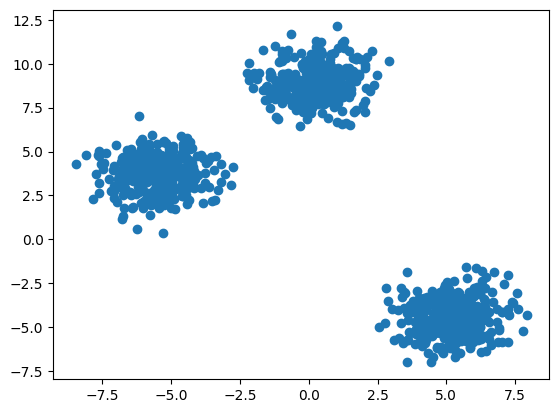

In [7]:
x.shape

plt.scatter(x[:,0],x[:,1])

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [9]:
from sklearn.cluster import KMeans

##Manual Process
## Elbow Method to select the K value

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

In [10]:
wcss

[34827.57682552022,
 7935.437286145416,
 1319.2730531585607,
 1193.9227442698636,
 1008.034742324067,
 854.2929980760777,
 776.4806197828644,
 667.3702849234676,
 621.1207396355152,
 534.7979416143593]

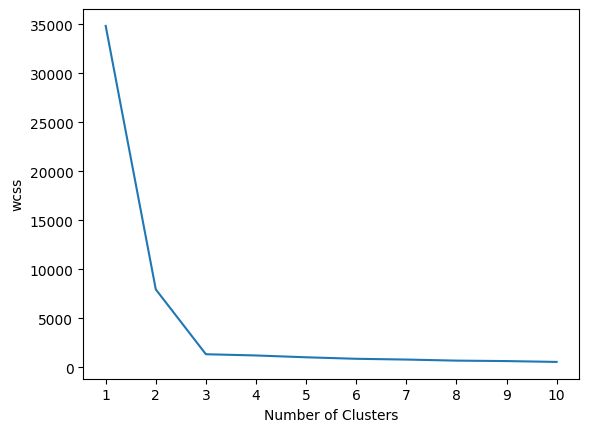

In [11]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

In [12]:
kmeans= KMeans(n_clusters=3, init="k-means++")

In [14]:
y_label=kmeans.fit_predict(x_train)

In [17]:
y_test_label=kmeans.predict(x_test)

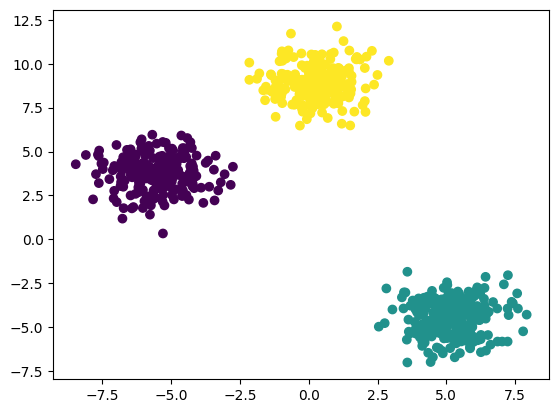

In [15]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_label)

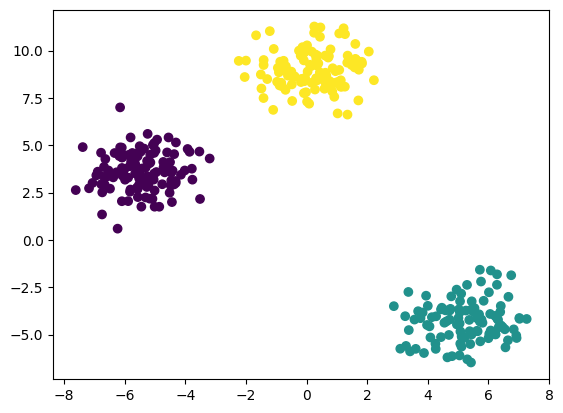

In [18]:
#test data
plt.scatter(x_test[:,0],x_test[:,1],c=y_test_label)

Auto mate  find the  cluster 
used knee lib

In [ ]:
# pip install kneed

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from kneed import KneeLocator

k1= KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.elbow 

3

In [22]:
## Performanc metrics
## Silhoutte score

from sklearn.metrics import silhouette_score

silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train)
    score=silhouette_score(x_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [23]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6397177440558489,
 0.4801058067583632,
 0.3245015502002103,
 0.31589861777086,
 0.3250216500667839,
 0.34262714738997774,
 0.32790605056369804]

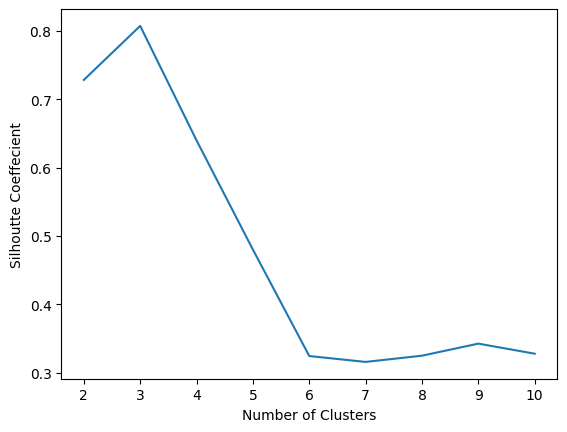

In [24]:
## plot silhouette score

plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()